# Homework 1 example code solutions

In [23]:
import numpy as np
import jax
import jax.numpy as jnp
from jax import config

config.update("jax_enable_x64", True)

import matplotlib.pyplot as plt
import niceplots

plt.style.use(niceplots.get_style())
niceColors = niceplots.get_colors_list()

# Force the jupyter notebook to use vector graphics
import matplotlib_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("pdf", "svg")

## Problem 2

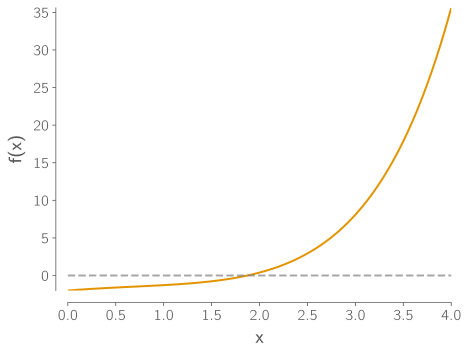

In [24]:
# Define the function
def func(x):
    return jnp.exp(x) - x**2 - 3


fig, ax = plt.subplots()
x = jnp.linspace(0, 4, 100)
ax.plot(x, func(x), label="f(x)")
ax.axhline(y=0, color="gray", alpha=0.7, linestyle="--")
niceplots.adjust_spines(ax)
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
plt.show()

Iteration 00: x =  1.500e+00, f(x) = -7.683e-01
Iteration 01: x =  2.250e+00, f(x) =  1.425e+00
Iteration 02: x =  1.875e+00, f(x) =  5.194e-03
Iteration 03: x =  1.688e+00, f(x) = -4.417e-01
Iteration 04: x =  1.781e+00, f(x) = -2.356e-01
Iteration 05: x =  1.828e+00, f(x) = -1.198e-01
Iteration 06: x =  1.852e+00, f(x) = -5.852e-02
Iteration 07: x =  1.863e+00, f(x) = -2.697e-02
Iteration 08: x =  1.869e+00, f(x) = -1.096e-02
Iteration 09: x =  1.872e+00, f(x) = -2.904e-03
Iteration 10: x =  1.874e+00, f(x) =  1.140e-03
Iteration 11: x =  1.873e+00, f(x) = -8.832e-04
Iteration 12: x =  1.873e+00, f(x) =  1.282e-04
Iteration 13: x =  1.873e+00, f(x) = -3.776e-04
Iteration 14: x =  1.873e+00, f(x) = -1.247e-04
Iteration 15: x =  1.873e+00, f(x) =  1.716e-06
Iteration 16: x =  1.873e+00, f(x) = -6.151e-05
Iteration 17: x =  1.873e+00, f(x) = -2.990e-05
Iteration 18: x =  1.873e+00, f(x) = -1.409e-05
Iteration 19: x =  1.873e+00, f(x) = -6.187e-06
Iteration 20: x =  1.873e+00, f(x) = -2.

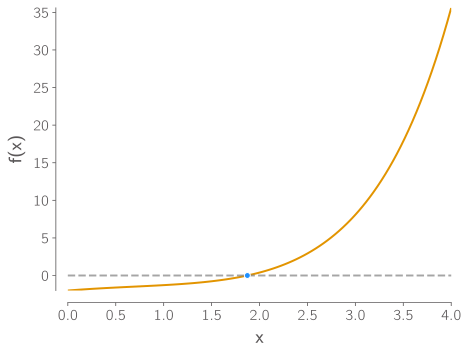

In [25]:
def bisection(f, a, b, tol=1e-6, max_iterations=100):
    # First, check that a and b do actually bracket a root
    fa = f(a)
    fb = f(b)
    f_history = []

    if fa * fb > 0:
        raise ValueError("Initial interval does not bracket a root.")

    for i in range(max_iterations):
        c = (a + b) / 2
        fc = f(c)
        f_history.append(abs(float(fc)))

        print(f"Iteration {i:02d}: x = {c: 7.3e}, f(x) = {fc: 7.3e}")

        if jnp.abs(fc) < tol:
            return c, f_history

        if fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc

    return (
        None,
        f_history,
    )  # Return None as the root if the root was not found within max_iterations


# Initial interval
a = 0
b = 3

root, history = bisection(func, a, b)
if root is not None:
    print(f"Root found at x = {root}")
else:
    print("Root not found within max_iterations")

ax.plot(root, func(root), "o", color="C1", label="Root")
fig

## Problem 3

In [26]:
def newton_raphson(f, dfdx, x0, tol=1e-6, max_iterations=100):
    x = x0
    f_history = []
    for i in range(max_iterations):
        f_val = f(x)
        f_history.append(abs(float(f_val)))
        print(f"Iteration {i:02d}: x = {x: 7.3e}, f(x) = {f_val: 7.3e}")

        # If f(x) is close enough to zero, we are done
        if jnp.abs(f_val) < tol:
            return x, f_history
        f_prime_val = dfdx(x)

        # Otherwise, take a Newton-Raphson step
        x -= f_val / f_prime_val

    return (
        None,
        f_history,
    )  # Return None if the root was not found within max_iterations


Finding closest point to (1.57, 4.00)
Iteration 00: x =  1.571e+00, f(x) = -3.674e-16
Closest point is (1.57, 1.00)

Finding closest point to (-0.20, 0.20)
Iteration 00: x = -2.000e-01, f(x) = -7.814e-01
Iteration 01: x =  7.685e-03, f(x) =  3.075e-02
Iteration 02: x =  2.648e-06, f(x) =  1.059e-05
Iteration 03: x =  3.506e-13, f(x) =  1.403e-12
Closest point is (0.00, 0.00)

Finding closest point to (1.00, 1.00)
Iteration 00: x =  1.000e+00, f(x) = -1.713e-01
Iteration 01: x =  1.060e+00, f(x) = -4.550e-03
Iteration 02: x =  1.062e+00, f(x) = -3.452e-06
Iteration 03: x =  1.062e+00, f(x) = -1.991e-12
Closest point is (1.06, 0.87)


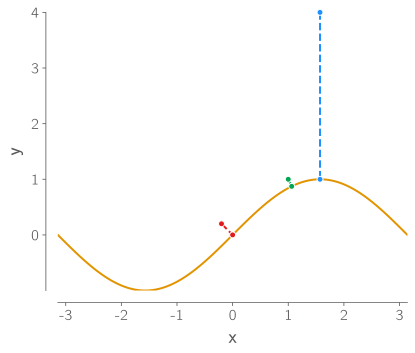

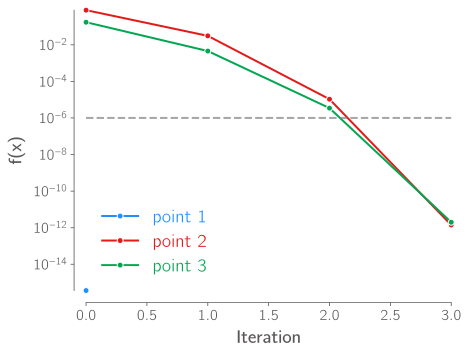

In [27]:
def distance(x, x0, y0):
    return (x - x0) ** 2 + (np.sin(x) - y0) ** 2


def derivative_distance(x, x0, y0):
    return 2 * (x - x0) + 2 * (np.sin(x) - y0) * np.cos(x)


def derivative2_distance(x, x0, y0):
    return 2 + 2 * np.cos(x) ** 2 - 2 * np.sin(x) ** 2 + 2 * y0 * np.sin(x)


fig, ax = plt.subplots()
xPlot = np.linspace(-np.pi, np.pi, 100)
yPlot = np.sin(xPlot)
ax.plot(xPlot, yPlot)
ax.set_xlabel("x")
ax.set_ylabel("y")

histFig, histAx = plt.subplots()
histAx.set_xlabel("Iteration")
histAx.set_ylabel("f(x)")

x0 = [np.pi / 2, -0.2, 1.0]
y0 = [4, 0.2, 1.0]

for ii in range(len(x0)):
    initial_guess = x0[ii]
    f = lambda x: derivative_distance(x, x0[ii], y0[ii])
    dfdx = lambda x: derivative2_distance(x, x0[ii], y0[ii])

    print(f"\nFinding closest point to ({x0[ii]:.2f}, {y0[ii]:.2f})")
    rootX, history = newton_raphson(f, dfdx, initial_guess)
    print(f"Closest point is ({rootX:.2f}, {np.sin(rootX):.2f})")

    ax.plot([x0[ii], rootX], [y0[ii], np.sin(rootX)], "--", color=niceColors[ii + 1], clip_on=False)
    ax.plot(rootX, np.sin(rootX), "o", color=niceColors[ii + 1], label=f"point {ii+1}", clip_on=False)
    ax.plot(x0[ii], y0[ii], "o", color=niceColors[ii + 1], label=f"point {ii+1}", clip_on=False)

    histAx.semilogy(history, "-o", color=niceColors[ii + 1], label=f"point {ii+1}", clip_on=False)

ax.set_aspect("equal")
niceplots.adjust_spines(ax)
niceplots.adjust_spines(histAx)
histAx.legend(labelcolor="linecolor")
histAx.axhline(y=1e-6, color="gray", alpha=0.7, linestyle="--")

## Problem 4

In [28]:
def newton_raphson(f, x0, tol=1e-6, max_iterations=100):
    x = x0
    f_history = []
    dfdx = jax.grad(f)
    for i in range(max_iterations):
        f_val = f(x)
        f_history.append(abs(float(f_val)))
        print(f"Iteration {i:02d}: x = {x: 7.3e}, f(x) = {f_val: 7.3e}")

        # If f(x) is close enough to zero, we are done
        if jnp.abs(f_val) < tol:
            return x, f_history
        f_prime_val = dfdx(x)

        # Otherwise, take a Newton-Raphson step
        x -= f_val / f_prime_val

    return (
        None,
        f_history,
    )  # Return None if the root was not found within max_iterations


Finding closest point to (1.57, 4.00)
Iteration 00: x =  1.571e+00, f(x) = -3.674e-16
Closest point is (1.57, 1.00)

Finding closest point to (-0.20, 0.20)
Iteration 00: x = -2.000e-01, f(x) = -7.814e-01
Iteration 01: x =  7.685e-03, f(x) =  3.075e-02
Iteration 02: x =  2.648e-06, f(x) =  1.059e-05
Iteration 03: x =  3.506e-13, f(x) =  1.403e-12
Closest point is (0.00, 0.00)

Finding closest point to (1.00, 1.00)
Iteration 00: x =  1.000e+00, f(x) = -1.713e-01
Iteration 01: x =  1.060e+00, f(x) = -4.550e-03
Iteration 02: x =  1.062e+00, f(x) = -3.452e-06
Iteration 03: x =  1.062e+00, f(x) = -1.991e-12
Closest point is (1.06, 0.87)


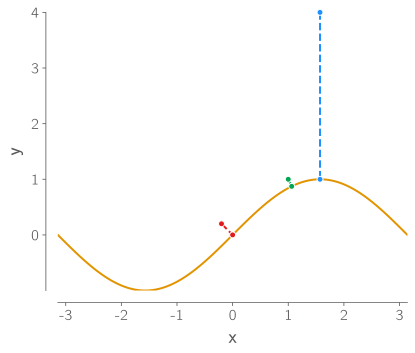

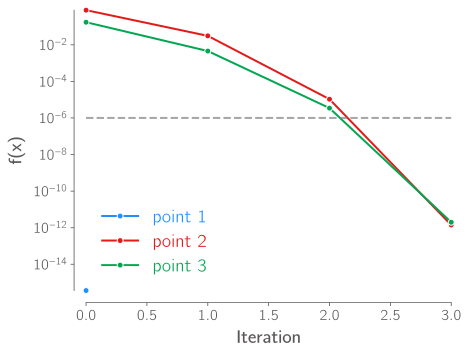

In [30]:
def distance(x, x0, y0):
    return (x - x0) ** 2 + (jnp.sin(x) - y0) ** 2


derivative_distance = jax.grad(distance)


fig, ax = plt.subplots()
xPlot = np.linspace(-np.pi, np.pi, 100)
yPlot = np.sin(xPlot)
ax.plot(xPlot, yPlot)
ax.set_xlabel("x")
ax.set_ylabel("y")

histFig, histAx = plt.subplots()
histAx.set_xlabel("Iteration")
histAx.set_ylabel("f(x)")

x0 = [np.pi / 2, -0.2, 1.0]
y0 = [4, 0.2, 1.0]

for ii in range(len(x0)):
    initial_guess = x0[ii]
    f = lambda x: derivative_distance(x, x0[ii], y0[ii])

    print(f"\nFinding closest point to ({x0[ii]:.2f}, {y0[ii]:.2f})")
    rootX, history = newton_raphson(f, initial_guess)
    print(f"Closest point is ({rootX:.2f}, {np.sin(rootX):.2f})")

    ax.plot([x0[ii], rootX], [y0[ii], np.sin(rootX)], "--", color=niceColors[ii + 1], clip_on=False)
    ax.plot(rootX, np.sin(rootX), "o", color=niceColors[ii + 1], label=f"point {ii+1}", clip_on=False)
    ax.plot(x0[ii], y0[ii], "o", color=niceColors[ii + 1], label=f"point {ii+1}", clip_on=False)

    histAx.semilogy(history, "-o", color=niceColors[ii + 1], label=f"point {ii+1}", clip_on=False)

ax.set_aspect("equal")
niceplots.adjust_spines(ax)
niceplots.adjust_spines(histAx)
histAx.legend(labelcolor="linecolor")
histAx.axhline(y=1e-6, color="gray", alpha=0.7, linestyle="--")